# Sitio de entranmiento analisis exploratorio.

In [1]:
## Importar librerias.

import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import geopandas as gpd
import folium 
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from shapely.geometry import Point

1. Cargar datos desde un geopackage



In [33]:
sitios_entrenamiento = gpd.read_file('sitios_entrenamiento_2021_reflex.gpkg', layer = 'sitios_entrenamiento_2021')

<Axes: >

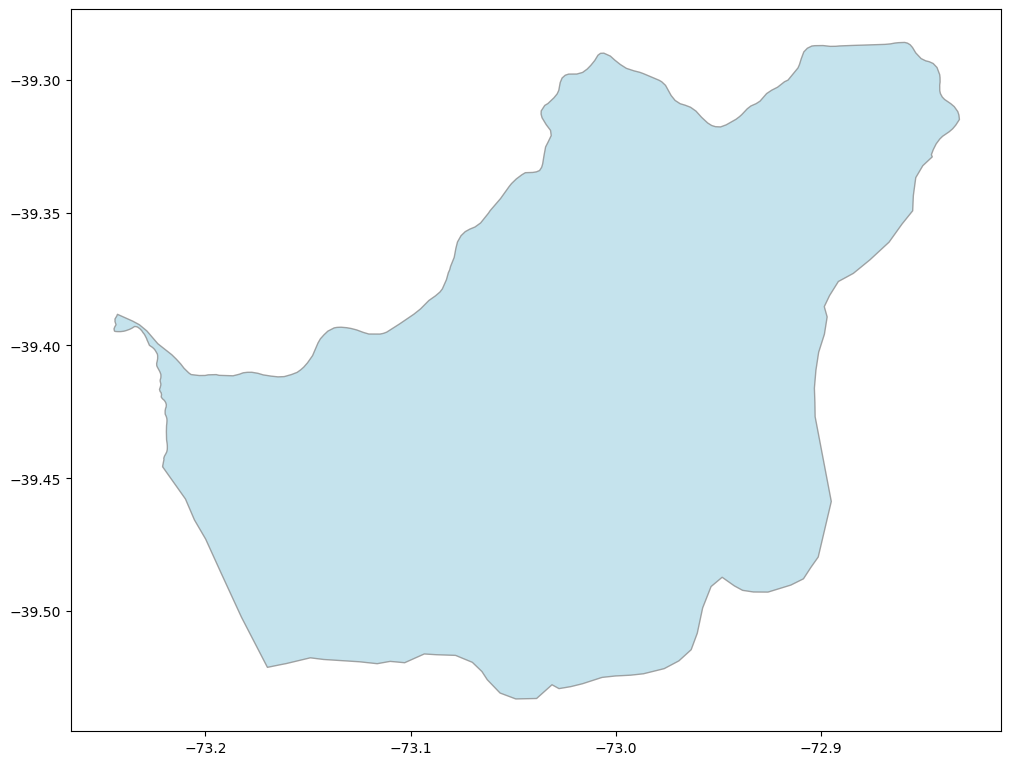

In [35]:
lingue = gpd.read_file('lingue.shp')

lingue = lingue.to_crs(epsg = 4326)


# Assuming 'lingue' is your GeoDataFrame
fig, ax = plt.subplots(figsize=(12, 12))  # Increase figure size

# Plot the GeoDataFrame with improvements
lingue.plot(
    ax=ax,
    edgecolor="gray",       # Set edge color
    color="lightblue",      # Set fill color (adjust as needed)
    alpha=0.7,              # Adjust transparency
    linewidth=1             # Adjust edge line width
)



Representacion espacial

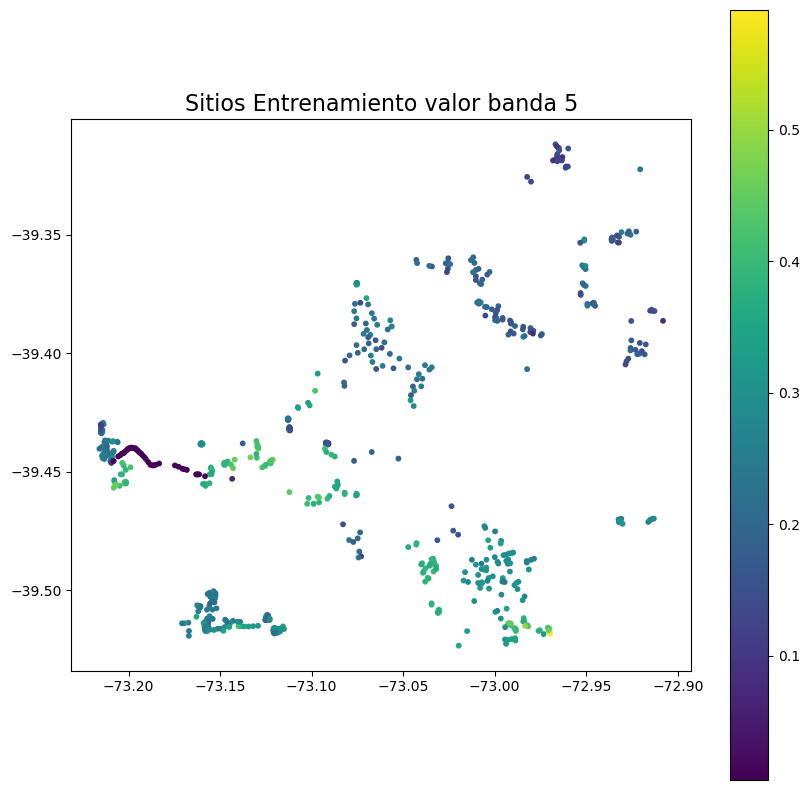

In [28]:
sitios_entrenamiento.plot(
    column = 'B5', # columna de atributos para representar un volor  
    cmap = 'viridis', # Elegir una escala de colores
    legend = True, # Mostrar la layenda
    edgecolor = None, # color del color
    markersize = 10, # Tamaño de los circulos
    figsize = (10,10)) # Tamaño de la imagen

plt.title('Sitios Entrenamiento valor banda 5', fontsize = 16)
plt.show()

fix, ax = plt.subplots(figsize = (12,12))

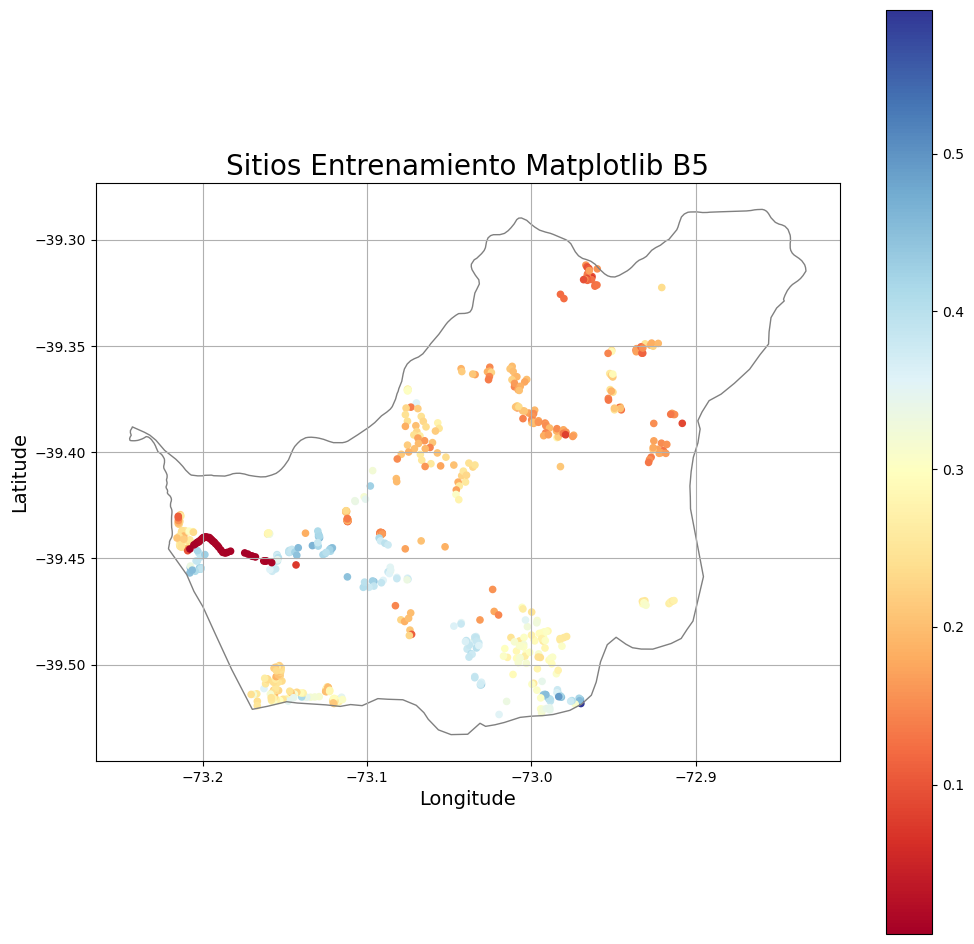

In [29]:
# congurar la figura y los ejes
fig, ax = plt.subplots(figsize = (12,12))

# Color del fondo donde va el título leyenda y otros elementos

fig.patch.set_facecolor('white')

# Set the background color of the plot area
ax.set_facecolor('white')

# Definimos los datos del gráfico
sitios_entrenamiento.plot(
    ax = ax,
    column = 'B5', # Atributo
    cmap = 'RdYlBu',
    legend = True, # Añadir una leyenda
    edgecolor = None,
    markersize = 20
)

# Añadimos el geodataframe the lingue al mismo plot
lingue.plot(
    ax=ax,
    edgecolor="gray",  # Seleccionamos un color del borde
    color="none",  # Seleccionamos un color de relleno, none igual a transparente.
    linewidth=1  # Ajustar el ancho de la línea de borde 
)


ax.set_title('Sitios Entrenamiento Matplotlib B5', fontsize = 20) # Podemos definir un título y el tamaño de la letra
ax.set_ylabel('Latitude', fontsize = 14) # Podemos definir un título y el tamaño de la letra
ax.set_xlabel('Longitude', fontsize = 14) # Podemos definir un título y el tamaño de la letra
ax.grid(True) # Usando matplotlib podemos añadir una grilla

plt.show()







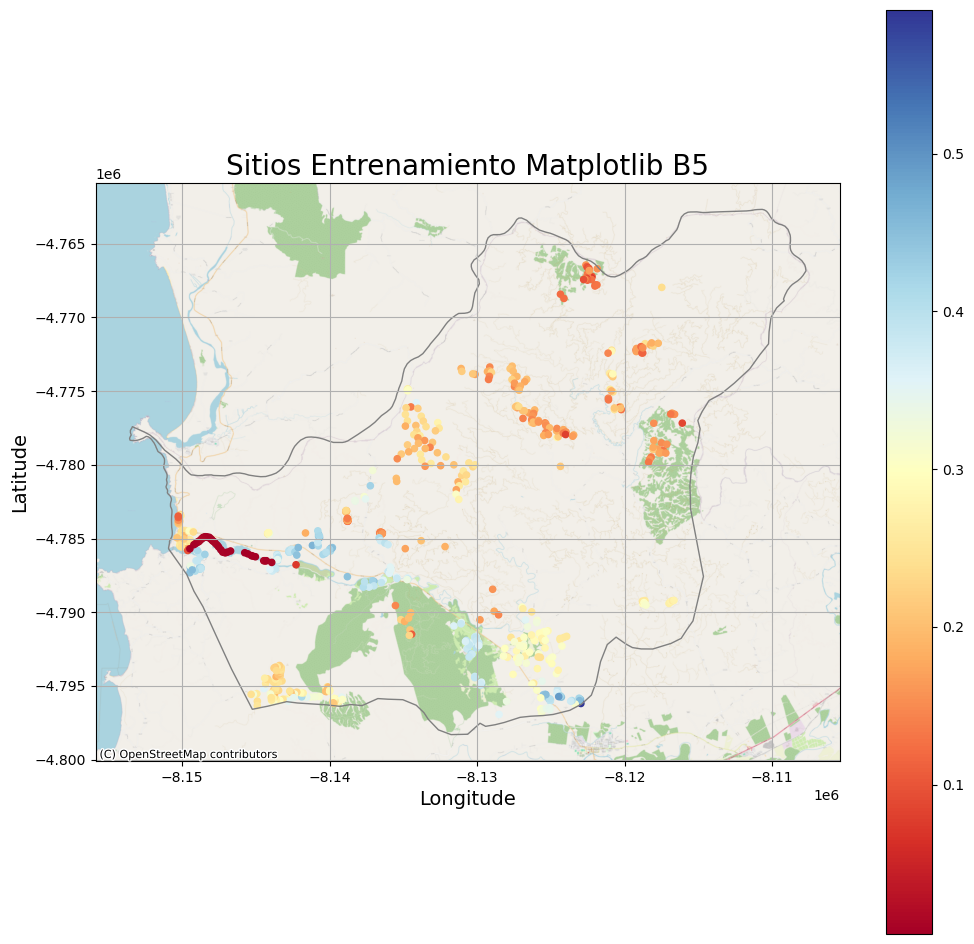

In [30]:
import contextily as ctx


# congurar la figura y los ejes
fig, ax = plt.subplots(figsize = (12,12))

# Color del fondo donde va el título leyenda y otros elementos

fig.patch.set_facecolor('white')

# Set the background color of the plot area
ax.set_facecolor('white')


# Reproject GeoDataFrames to EPSG:3857 if they are not already in that CRS
if sitios_entrenamiento.crs != 'EPSG:3857':
    sitios_entrenamiento = sitios_entrenamiento.to_crs(epsg=3857)

if lingue.crs != 'EPSG:3857':
    lingue = lingue.to_crs(epsg=3857)


# Definimos los datos del gráfico
sitios_entrenamiento.plot(
    ax = ax,
    column = 'B5', # Atributo
    cmap = 'RdYlBu',
    legend = True, # Añadir una leyenda
    edgecolor = None,
    markersize = 20
)

# Añadimos el geodataframe the lingue al mismo plot
lingue.plot(
    ax=ax,
    edgecolor="gray",  # Seleccionamos un color del borde
    color="none",  # Seleccionamos un color de relleno, none igual a transparente.
    linewidth=1  # Ajustar el ancho de la línea de borde 
)


ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom = 15)

ax.set_title('Sitios Entrenamiento Matplotlib B5', fontsize = 20) # Podemos definir un título y el tamaño de la letra
ax.set_ylabel('Latitude', fontsize = 14) # Podemos definir un título y el tamaño de la letra
ax.set_xlabel('Longitude', fontsize = 14) # Podemos definir un título y el tamaño de la letra
ax.grid(True) # Usando matplotlib podemos añadir una grilla

plt.show()

In [31]:
gdf = gdf.to_crs(epsg=3857)  # Reproject to Web Mercator (required for basemaps)
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)


NameError: name 'gdf' is not defined

In [57]:
sitios_entrenamiento.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [71]:
sitios_entrenamiento.isna().sum()

categoria     585
descrpcion    675
id_clase        0
B1              0
B2              0
B3              0
B4              0
B5              0
B6              0
B7              0
geometry        0
dtype: int64

In [72]:
sitios_entrenamiento = sitios_entrenamiento.dropna(subset = "id_clase")

In [73]:
sitios_entrenamiento.isna().sum()

categoria     585
descrpcion    675
id_clase        0
B1              0
B2              0
B3              0
B4              0
B5              0
B6              0
B7              0
geometry        0
dtype: int64

# Exploratory analysis

In [69]:
sitios_entrenamiento_num = sitios_entrenamiento.iloc[:,4:]
sitios_entrenamiento_num.describe()

,B2,B3,B4,B5,B6,B7
count,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000
mean,0.024941,0.045610,0.041384,0.248782,0.127314,0.070230
std,0.028345,0.037500,0.045536,0.107451,0.099853,0.069356
min,-0.001698,0.005233,0.002400,0.005356,0.003954,0.003541
25%,0.005136,0.013207,0.008003,0.182099,0.040267,0.015346
50%,0.012259,0.029721,0.017388,0.243809,0.082672,0.034300
75%,0.033124,0.069830,0.059270,0.316422,0.217010,0.112544
max,0.193222,0.234500,0.258012,0.590955,0.398758,0.284220


In [67]:
# Ahora queremos el valor medio por grupo
sitios_gr = sitios_entrenamiento.loc[:,['id_clase','B1','B2','B3','B4','B5','B6','B7']]
sitios_gr


,id_clase,B1,B2,B3,B4,B5,B6,B7
0,1.0,0.002125,0.004903,0.012630,0.007047,0.196165,0.039470,0.014692
1,1.0,0.003142,0.005123,0.012795,0.006800,0.217505,0.042550,0.015105
2,1.0,0.003142,0.005123,0.012795,0.006800,0.217505,0.042550,0.015105
3,1.0,0.002785,0.004655,0.012822,0.007212,0.198447,0.041725,0.015352
4,1.0,0.002785,0.004655,0.012822,0.007212,0.198447,0.041725,0.015352
...,...,...,...,...,...,...,...,...
684,6.0,0.004985,0.007240,0.016425,0.008587,0.010320,0.006112,0.004573
685,6.0,0.009000,0.010815,0.018570,0.013593,0.073543,0.032238,0.020303
686,6.0,-0.002908,0.003857,0.017717,0.011365,0.007075,0.008807,0.008313
687,6.0,0.002098,0.007625,0.020880,0.012960,0.009825,0.007240,0.005535


In [68]:
sitios_mean = sitios_gr.groupby(by = ['id_clase']).mean()
sitios_mean

,B1,B2,B3,B4,B5,B6,B7
id_clase,,,,,,,
1.0,0.001971,0.004010,0.011018,0.006356,0.170971,0.037597,0.014538
2.0,0.007529,0.010314,0.027668,0.016461,0.254519,0.078667,0.031782
3.0,0.024680,0.030115,0.065067,0.051035,0.396944,0.209587,0.101517
4.0,0.080230,0.094354,0.125370,0.136132,0.227654,0.235353,0.196502
5.0,0.041860,0.055127,0.088857,0.114197,0.296893,0.301350,0.182160
6.0,0.008117,0.011906,0.022384,0.012827,0.011771,0.008219,0.006286


<Axes: >

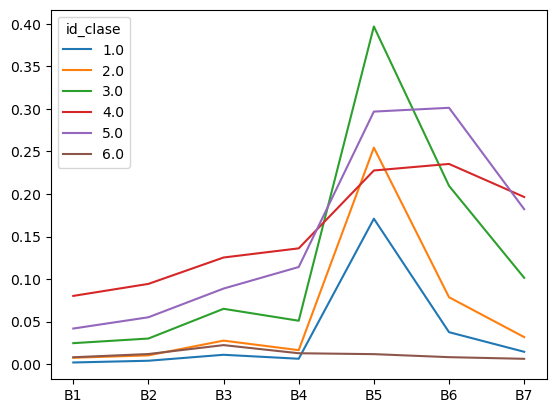

In [7]:
sitios_mean.transpose().plot() ## Como podemos modificar la Leyenda para colocar los nombre de las categorias.


<Axes: >

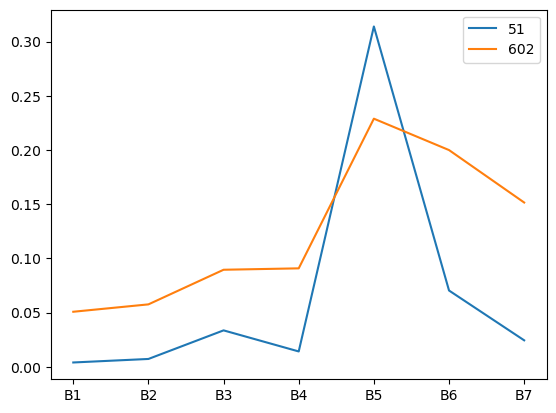

In [8]:
## Scatterplot para ver las firmas espectrales por punto
## Esto lo podemos implementar en un grafico interactivo en streamlit
## Para identificar la firma espectral para cada uno de los puntos
sitios.iloc[[51,600],4:].transpose().plot()

array([[<Axes: title={'center': 'B1'}>, <Axes: title={'center': 'B2'}>,
        <Axes: title={'center': 'B3'}>],
       [<Axes: title={'center': 'B4'}>, <Axes: title={'center': 'B5'}>,
        <Axes: title={'center': 'B6'}>],
       [<Axes: title={'center': 'B7'}>, <Axes: >, <Axes: >]], dtype=object)

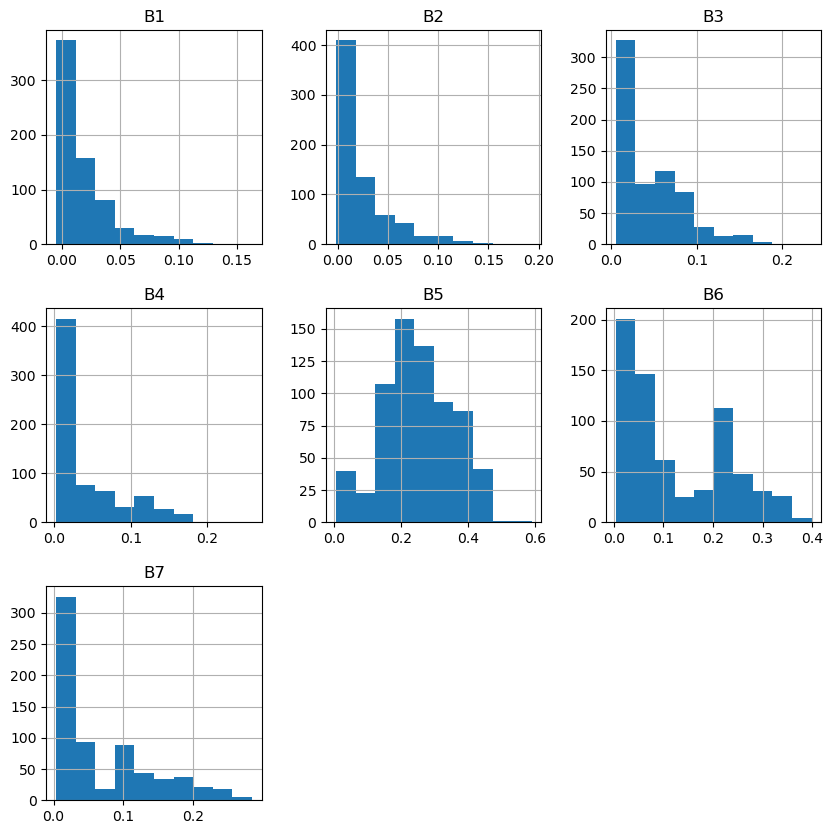

In [9]:
(sitios.loc[:,['B1','B2','B3','B4','B5','B6', 'B7']]).hist(figsize=(10,10))

# Categorias:

1: Plantacion, 2: Bosque Nativo, 3:Praderas, 4:Urbano, 5: Suelo descubierto, 
6: Agua. 

In [10]:
sitios_gr = sitios_gr.reset_index()

In [11]:
px.scatter(sitios_gr, x = 'B4', y = 'B5', color = 'id_clase',
           hover_data = ['id_clase', 'index'])

In [13]:
px.scatter_3d(sitios_gr, 
              x = 'B4',
              y = 'B3',
              z = 'B5',
              color = 'id_clase',
              hover_data = ["index", "id_clase"])

Distribucion los puntos por bandas. Todos los puntos con todas las bandas. Luego puntos 

# 1. Ahora vamos a evaluar la presencia de outliers de forma visual utilizando 
 boxplot por categoria.


In [14]:
sitios_gr

,index,id_clase,B1,B2,B3,B4,B5,B6,B7
0,0,1.0,0.002125,0.004902,0.012630,0.007047,0.196165,0.039470,0.014692
1,1,1.0,0.003142,0.005123,0.012795,0.006800,0.217505,0.042550,0.015105
2,2,1.0,0.003142,0.005123,0.012795,0.006800,0.217505,0.042550,0.015105
3,3,1.0,0.002785,0.004655,0.012822,0.007212,0.198447,0.041725,0.015352
4,4,1.0,0.002785,0.004655,0.012822,0.007212,0.198447,0.041725,0.015352
...,...,...,...,...,...,...,...,...,...
682,684,6.0,0.004985,0.007240,0.016425,0.008587,0.010320,0.006112,0.004573
683,685,6.0,0.009000,0.010815,0.018570,0.013593,0.073542,0.032238,0.020303
684,686,6.0,-0.002907,0.003857,0.017717,0.011365,0.007075,0.008807,0.008313
685,687,6.0,0.002097,0.007625,0.020880,0.012960,0.009825,0.007240,0.005535


In [15]:
sitios_gr_melt = sitios_gr.melt(id_vars  = ['index','id_clase'], var_name = 'Bands', value_name = 'value', ignore_index = True)

In [16]:
px.box(sitios_gr_melt.query("id_clase == 1 & Bands != 'B5' & Bands != 'B6'"), x = 'id_clase', y = 'value', color = 'Bands', hover_data=["index","id_clase"])

In [17]:
px.box(sitios_gr_melt.query("id_clase == 1 & Bands == 'B1'"), x = 'id_clase', color = 'id_clase', y = 'value', hover_data=["index","id_clase"]
    )

In [18]:
px.box(sitios_gr_melt.query("Bands == 'B1'"), x = 'id_clase', color = 'id_clase', y = 'value', hover_data=["index","id_clase"])


In [19]:
px.box(sitios_gr_melt.query("(id_clase == 1 | id_clase == 2 |  id_clase == 3) & Bands == 'B1'"), x = 'id_clase', color = 'id_clase', y = 'value', hover_data=["index","id_clase"])


In [20]:
px.box(sitios_gr_melt.query("(id_clase == 4 | id_clase == 5 |  id_clase == 6) & Bands == 'B1'"), x = 'id_clase', color = 'id_clase', y = 'value', hover_data=["index","id_clase"])


In [21]:
px.box(sitios_gr_melt.query("id_clase == 1 & Bands == 'B2'"), x = 'id_clase', color = 'id_clase', y = 'value', hover_data=["index","id_clase"])


In [22]:
px.histogram(sitios_gr_melt.query("id_clase == 2  & (Bands == 'B1'| Bands == 'B2' | Bands == 'B3'| Bands == 'B4' | Bands == 'B5' | Bands == 'B6' | Bands == 'B7')"), 
                                  x = "value", color = "Bands", nbins = 100)

In [23]:
px.histogram(sitios_gr_melt, x = "value", color = "Bands")

In [24]:
px.histogram(sitios_gr_melt.query("Bands == 'B4'"), x = "value", color = "id_clase", nbins = 100)

In [25]:
px.histogram(sitios_gr_melt.query("(id_clase == 1 | id_clase == 2 | id_clase == 6 ) & Bands == 'B7'"), 
                                  x = "value", color = "id_clase", nbins = 100)

In [26]:
px.histogram(sitios_gr_melt.query("(id_clase == 3 | id_clase == 4 | id_clase == 5 ) & Bands == 'B7'"), 
                                  x = "value", color = "id_clase", nbins = 100)

# FIN